# EXPLORATORY ANALYSIS OF EMPLOYEMENT RATES IN US
The dataset contains the information about US Employment rates from 1941-2010
## Objectives
 - A good economic indicator can also be the trends in rise and fall of the employment in a country.
 - This analysis on this data will help us in predicting future trends.

## Variables
 - year
 - population
 - labor_force
 - population_percent
 - employed_total
 - employed_percent
 - agrictulture_ratio
 - nonagriculture_ratio
 - unemployed
 - unemployed_percent
 - not_in_labor
 
## Analysis by:
 - Wahaj Javed(20K-0208)
 - Mohsin Ali Mirza(20K-0353)
 - Hatif Mujahid(20K-0218)
 - Ahmad Aleem(20K-0169)
    

## Importing Relevant Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import numpy as np

## Importing The Dataset
First we will import and view the cells in our dataset

In [3]:
data = pd.read_csv("Dataset.csv")
data.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


## Calculate the Five-Number Summary of the Relevant Fields
Now, we will filter the data to find relevant cells for which we can calculate the five number summary

In [4]:
data.drop(columns = ['year','population_percent','employed_percent','unemployed_percent','footnotes']).describe()

,population,labor_force,employed_total,agrictulture_ratio,nonagriculture_ratio,unemployed,not_in_labor
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,156272.521127,98707.492958,93033.577465,4456.492958,88577.028169,5673.774648,57564.929577
std,44979.642300,33380.727804,30992.290437,2055.547406,32739.727633,2954.030173,11795.889143
min,93220.000000,53860.000000,50350.000000,2095.000000,41250.000000,670.000000,38590.000000
25%,112996.000000,67284.000000,63935.000000,3235.000000,57818.500000,3131.500000,45969.000000
50%,153153.000000,93774.000000,86794.000000,3440.000000,83279.000000,5692.000000,59377.000000
75%,193821.500000,128652.500000,119526.000000,5766.500000,116357.000000,7614.000000,65169.000000
max,237830.000000,154287.000000,146047.000000,9250.000000,143952.000000,14825.000000,83941.000000


# 1 - Observing the trend between Year, Population and Labor Force
We will start our analysis by observing the trends between total population in a certain year and the labor force

In [53]:
print(data['population'].corr(data['year']))
print(data['population'].corr(data['labor_force']))

0.9924347768754423
0.9984651248690106


## Conclusion
Hence, we can say that the population increases over the years and with the population, the labor force also increases thus they are all positively correlated

# 2 - Observing the trend between Labor Force and Total Employed People
We will draw a scatter plot to observe the distribution of the employement rates with respect to Labor Force

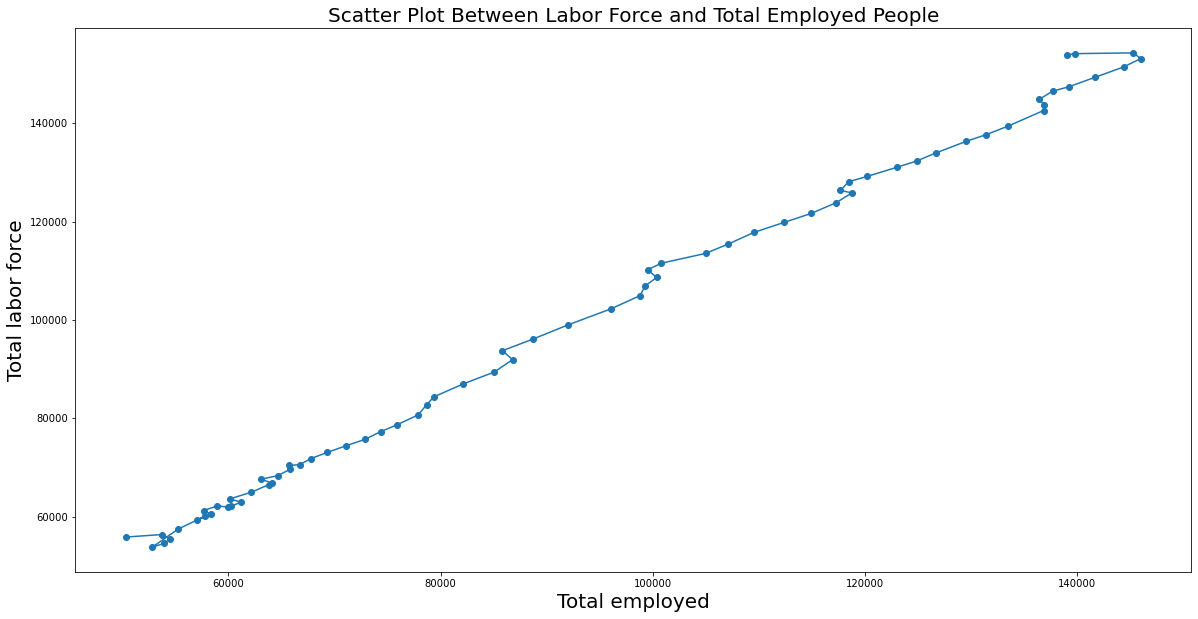

In [6]:
plt.figure(figsize=(20, 10))
pop_employed = data[['labor_force','employed_total']]
plt.ylabel('Total labor force',fontsize = 20)
plt.xlabel('Total employed',fontsize=20)
plt.title("Scatter Plot Between Labor Force and Total Employed People",fontsize=20)
plt.scatter(y=pop_employed['labor_force'],x=pop_employed['employed_total'])
plt.plot(pop_employed['employed_total'],pop_employed['labor_force'])
plt.show()

## Confirming the Correlation
From the Scatter Plot, the dots seem to show a positive correlation between the labor force and employement rates
so we will confirm this hypothesis with a heat map

<AxesSubplot:title={'center':'Heat Map of Labor Force and Employment Rates'}>

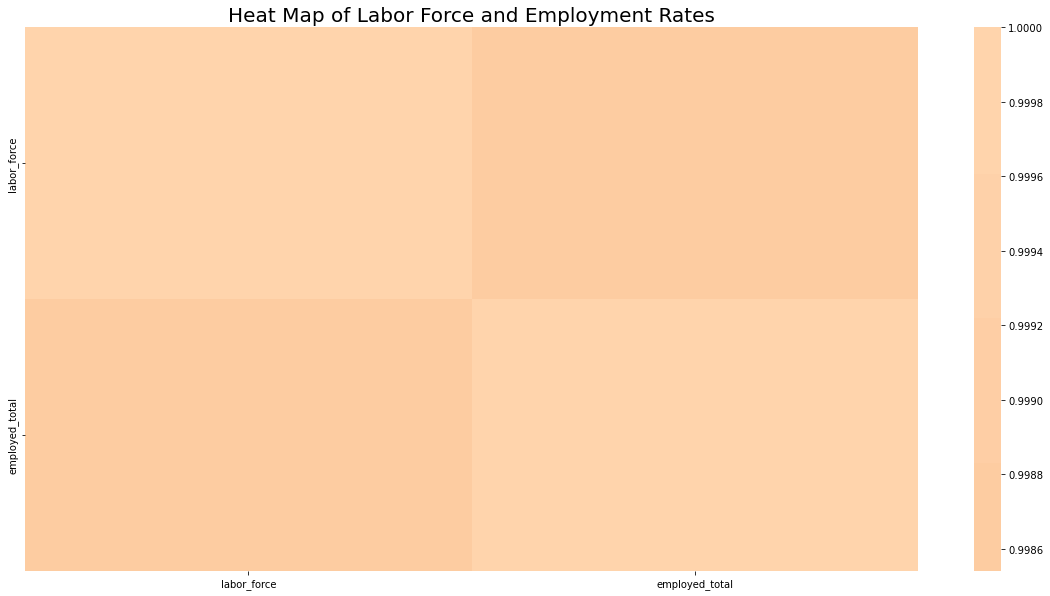

In [7]:
plt.figure(figsize=(20, 10))
plt.title("Heat Map of Labor Force and Employment Rates",fontsize=20)
pop_employed = data[['labor_force','employed_total']]
sns.heatmap(pop_employed.corr(),xticklabels=pop_employed.corr().columns,yticklabels = pop_employed.corr().columns,center = 0.95)

## Conclusion
From the heat map,it can also be observed how close the heat signatures are, and the upward line from the scatter plot proves that the two fields are extremely correlated. Hence, the employment rates increase greatly with the increasing labor force.

# 3 - Observing the Trend between labor force and unemployed people
Now, lets observe the trends between those in the labor force yet unemployed in order to understand if unemployment is also increasing with the labor force

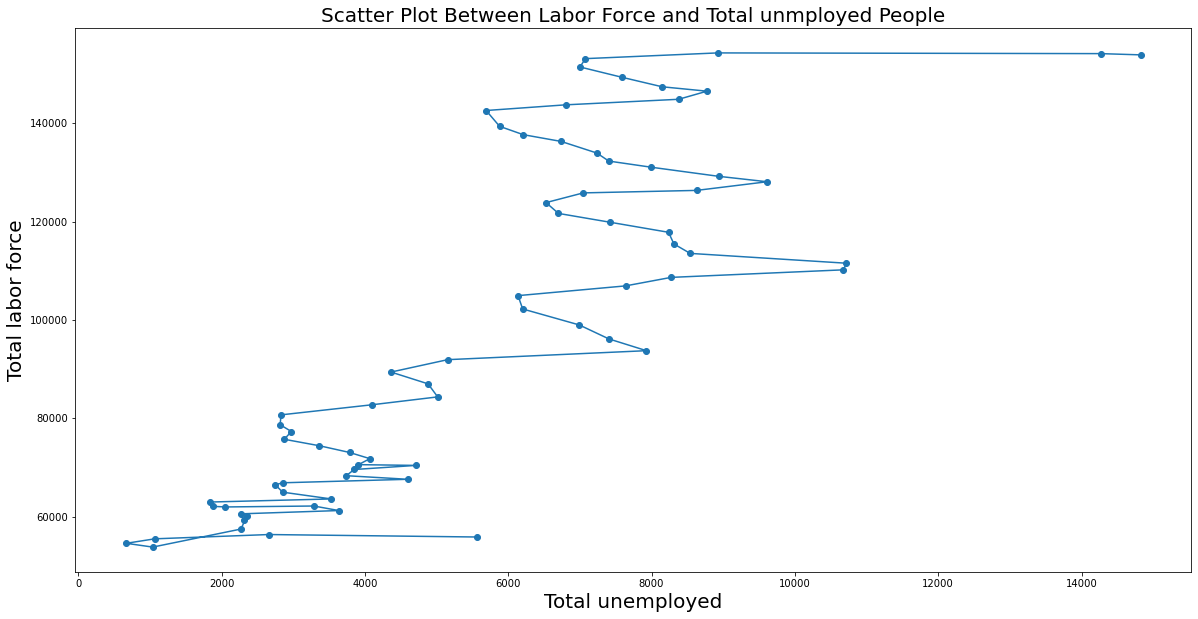

In [8]:
plt.figure(figsize=(20, 10))
pop_unemployed = data[['labor_force','unemployed']]
plt.ylabel('Total labor force',fontsize = 20)
plt.xlabel('Total unemployed',fontsize=20)
plt.title("Scatter Plot Between Labor Force and Total unmployed People",fontsize=20)
plt.scatter(y=pop_unemployed['labor_force'],x=pop_unemployed['unemployed'])
plt.plot(pop_unemployed['unemployed'],pop_unemployed['labor_force'])
plt.show()

<AxesSubplot:title={'center':'Heat Map of Labor Force and Unemployment Rates'}>

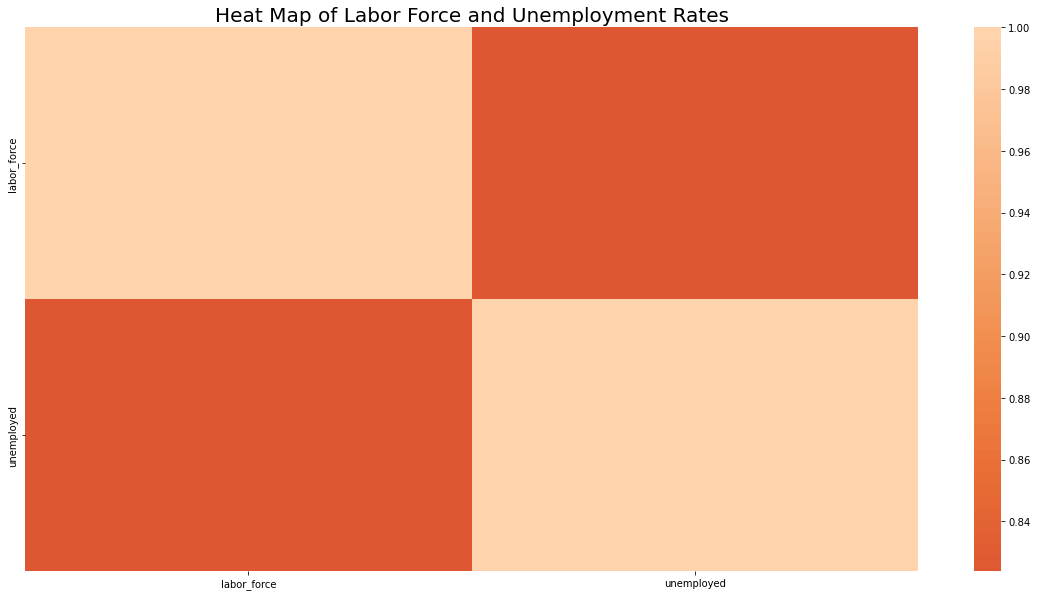

In [9]:
plt.figure(figsize=(20, 10))
plt.title("Heat Map of Labor Force and Unemployment Rates",fontsize=20)
pop_employed = data[['labor_force','unemployed']]
sns.heatmap(pop_employed.corr(),xticklabels=pop_employed.corr().columns,yticklabels = pop_employed.corr().columns,center = 0.5)

## Conclusion
With the above visualizations, it can be seen that the unemployment rates are increasing with the labor force but not at a constant rate since we can see in our scatter plots that the rate decreases and increases overtime and the disrelation in the heatmap supports the argument as well

# 4 - Comparing the Employment and Unemployment Rates
Since, The labor force is composed of the employed and umeployed people so we will compare the employment and unemployment rates over the years

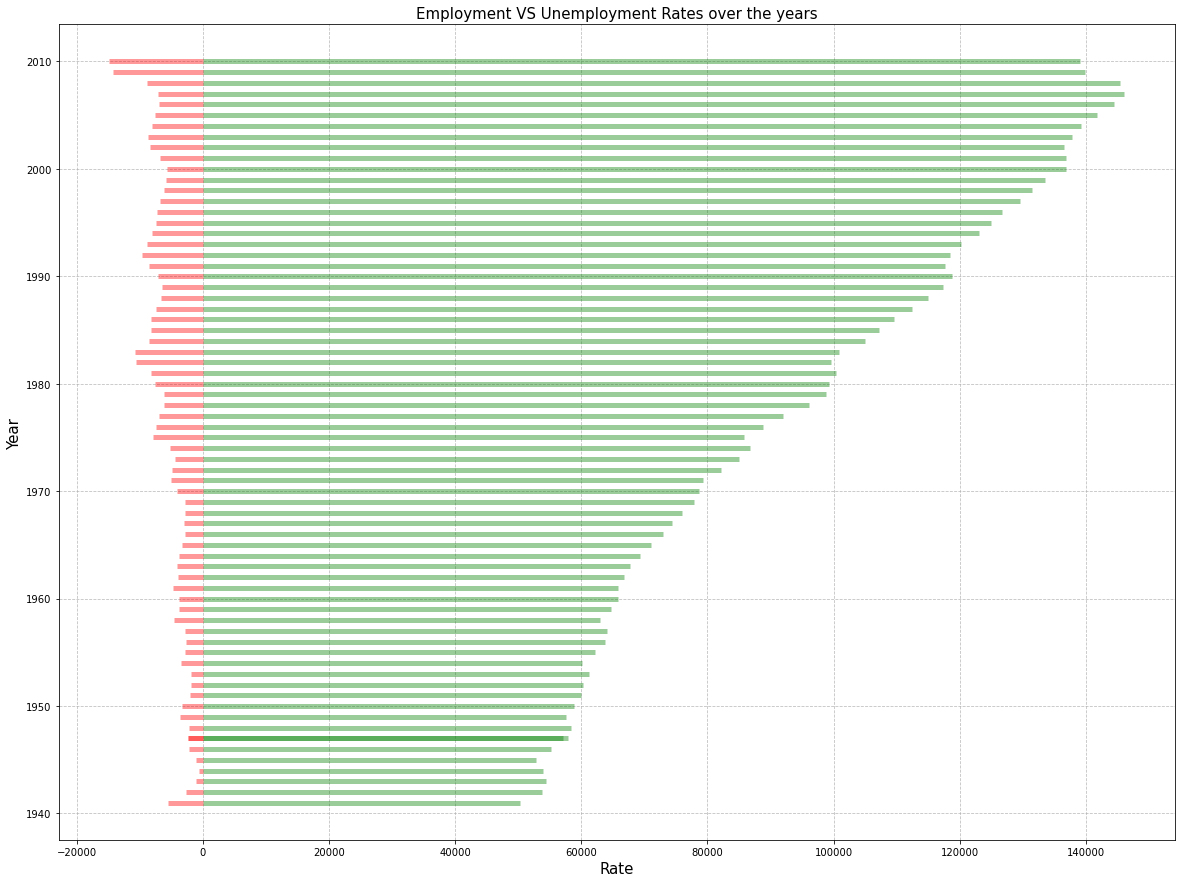

In [38]:
plt.figure(figsize=(20, 15))
pd.options.mode.chained_assignment = None  # default='warn'
df = data[['year','employed_total','unemployed']]
df['unemployed'] = df['unemployed'] * -1
plt.hlines(y=df.year, xmin=0, xmax=df.employed_total,
           color='green', alpha=0.4, linewidth=5)
plt.hlines(y=df.year, xmin=df.unemployed, xmax=0,
           color='red', alpha=0.4, linewidth=5)
plt.grid(linestyle='--', alpha=0.8)
plt.title('Employment VS Unemployment Rates over the years',fontsize=15)
plt.xlabel('Rate',fontsize=15)
plt.ylabel('Year',fontsize=15)
plt.show()

## Conclusion
From the Diverging Bar chart, it can be confirmed that the employment rates(the green bars) are far more greater as compared to the unemployment rates(the red bars) over the years.

# 5 - Comparing the Agricultural and Non-Agricultural Rates
Finally, among the employed people, there are two categories which are the agricultural and non-agricultural people so we will now compare to see which side has the more weight

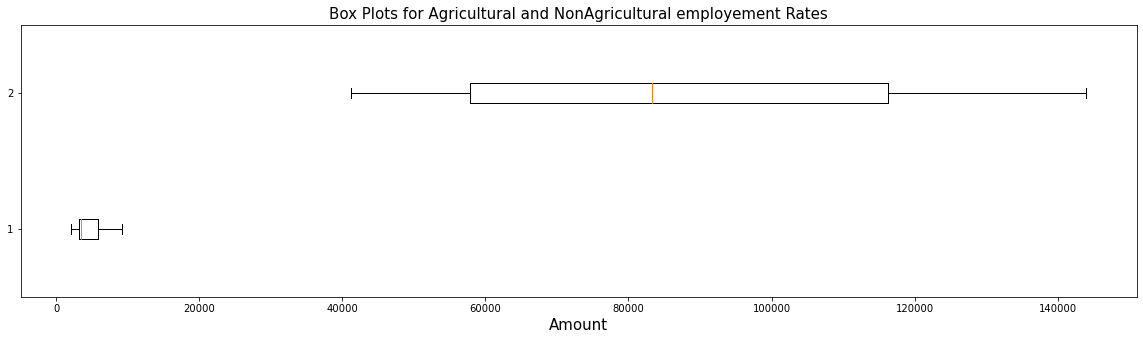

In [54]:
plt.figure(figsize=(20, 5))
plt.boxplot(x=data['agrictulture_ratio'],positions=[1],vert=False)
plt.boxplot(x=data['nonagriculture_ratio'],positions=[2],vert=False)
plt.title("Box Plots for Agricultural and NonAgricultural employement Rates",fontsize=15)
plt.xlabel('Amount',fontsize=15)
plt.show()

## Conclusion
From the box Plot, it can be observed that the non-agriculture rates are far greater than the agricultural rates over the years. In the plot for the non-agricultural rates, the positive skewness of the plot signifies that even though a group of values lie to the lesser non-agricultural rate area, there are some really wide values as well which came over the years meaning that the non-agricultural rates increase greatly while decrease at a small rate.

# 6 - Regression Model to Predict The Trends in Future Employment Rates

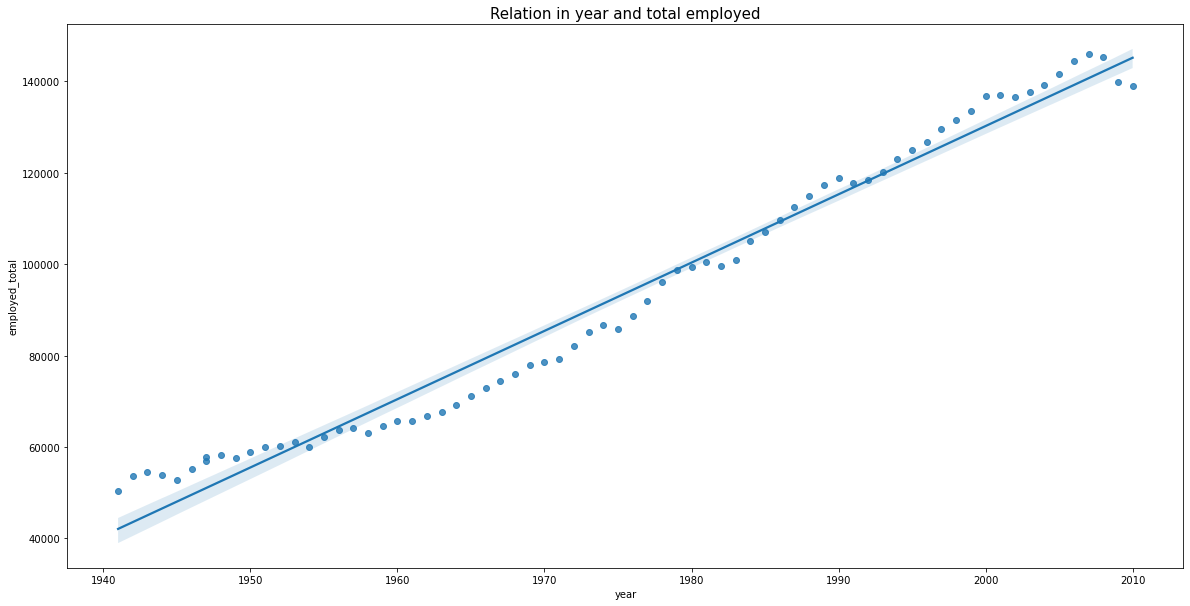

In [65]:
plt.figure(figsize=(20, 10))
plt.title('Relation in year and total employed',fontsize=15)
lr = sns.regplot(x="year", y="employed_total", data=data,fit_reg= True)

## Conclusion
From the Linear Regression Model, we can say that the employment rates tend to increase over the period of years and they WILL increase in the future at a greater rate than the current rate of employment

# Summary
 - The population is increasing each year.
 - With the population, the labor force is also increasing.
 - With the labor force, the employment rate is greatly increasing.
 - With the labor force, the unemployment rate is increasing but not extremely.
 - Among the labor force, The Employment Rate is greater than the unemployment rate.
 - The Employed People are composed more of Non-Agricultural Professions People than Agricultural Professions People.
 - The Employment rate is increasing almost linearly as time passes, hence THE RATE OF EMPLOYMENT IN THE US WILL INCREASE IN THE FUTURE.